In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the images you want to stitch
image1 = cv2.imread('/content/drive/MyDrive/cv/image_stitching/dancing-woman-left.jpg')
image2 = cv2.imread('/content/drive/MyDrive/cv/image_stitching/dancing-woman-left.jpg')

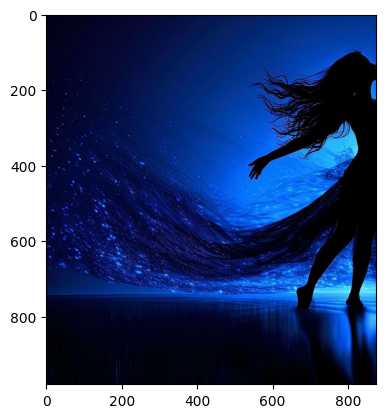

In [ ]:
plt.imshow(image1)

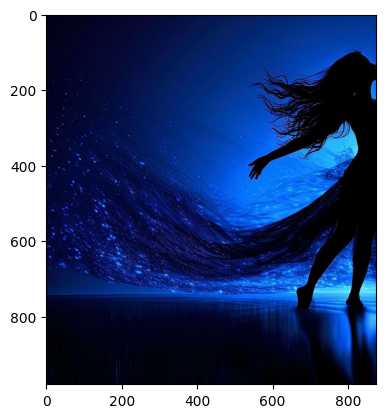

In [ ]:
plt.imshow(image2)

In [ ]:
# Convert images to grayscale (optional, but can improve matching)
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Create a SIFT (Scale-Invariant Feature Transform) detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors in the images
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

In [ ]:
# Create a Brute Force Matcher
bf = cv2.BFMatcher()

# Match descriptors between the two images
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Sort matches by distance
good_matches = sorted(good_matches, key=lambda x: x.distance)

# Extract matched keypoints
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Calculate the perspective transformation matrix
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 1)

In [ ]:
good_matches[0]

< cv2.DMatch 0x7c7b04753b30>

In [ ]:
src_pts

array([[[  4.2923756, 476.9973   ]],

       [[  4.2923756, 476.9973   ]],

       [[  6.310686 , 617.08594  ]],

       ...,

       [[867.0911   , 601.6677   ]],

       [[867.16846  , 679.2822   ]],

       [[868.68976  , 655.4412   ]]], dtype=float32)

In [ ]:
M

array([[ 1.00000000e+00,  6.98525253e-15, -4.36156692e-12],
       [ 3.01073195e-15,  1.00000000e+00, -4.15255036e-12],
       [ 4.76624431e-18,  1.24219323e-17,  1.00000000e+00]])

In [ ]:
# Warp the second image to align with the first image
h, w = gray1.shape
warped_image = cv2.warpPerspective(image2, M, (image2.shape[1], h))

In [ ]:
gray1.shape

(980, 874)

In [ ]:
gray2.shape

(980, 874)

In [ ]:
(w + image2.shape[1], h)

(1748, 980)

In [ ]:
warped_image.shape

(980, 874, 3)

In [ ]:
# Combine the two images
result = np.zeros((h, w + image2.shape[1], 3), dtype=np.uint8)
result[:h, :w] = image1
result[:h,w: ] = warped_image

In [ ]:
result.shape

(980, 1748, 3)

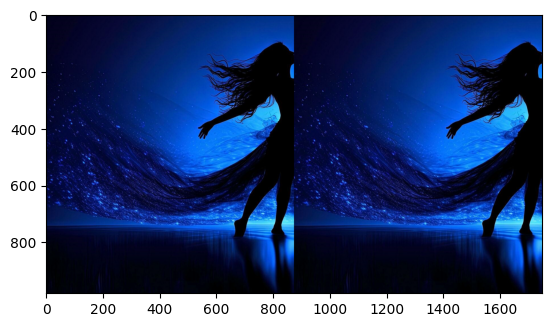

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(result)